In [1]:
from autocvd import autocvd
autocvd(num_gpus = 1)

[4]

In [2]:
import jax
import jax.numpy as jnp
from jax import jit, random
from unxt import Quantity



from unxt import Quantity
import galax as gx
import galax.coordinates as gc
import galax.potential as gp
import galax.dynamics as gd

from astropy import units as u


@jit
def stream_to_array(stream):
    pos = jnp.array([stream.q.x.to('kpc').value, stream.q.y.to('kpc').value, stream.q.z.to('kpc').value]).T
    vel = jnp.array([stream.p.x.to('km/s').value, stream.p.y.to('km/s').value, stream.p.z.to('km/s').value]).T
    pos_vel = jnp.concatenate([pos, vel], axis=1)
    return pos_vel


In [6]:
x_c = -8.34  # kpc
y_c = 0.0    # kpc
z_c = 16.0   # kpc
v_xc = 0.0    # km/s
v_yc = 220.0  # km/s
v_zc = 0.0    # km/s

prog_mass = 1e5  # Msun
m_nfw = 1.2e12  # Msun
r_s = 16.0      # kpc
gamma = 1.0     # dimensionless inner slope
t_end = 1024   # Myr
key = jax.random.PRNGKey(0)

#initial phase-space position of the progenitor
w = gc.PhaseSpacePosition(q=Quantity([x_c, y_c, z_c], unit="kpc"),
                            p=Quantity([v_xc, v_yc, v_zc], unit="km/s"))

#progenitor mass
prog_mass = Quantity(prog_mass, "Msun")

#total time integration
t_array = Quantity(-jnp.linspace(0, -t_end, 1000), "Myr")

#Milky Way base potential
milky_way_pot = gp.BovyMWPotential2014()

pot = gp.CompositePotential(
        halo = gp.NFWPotential(m=m_nfw, 
                                r_s=r_s, 
                                # gamma=gamma, 
                                units="galactic"),
        disk = milky_way_pot,
        bulge=milky_way_pot.bulge,
    )
#
# simulate stream
df = gd.ChenStreamDF()
gen = gd.MockStreamGenerator(df, pot)
stream, _ = gen.run(key, t_array, w, prog_mass)
stream_array = stream_to_array(stream)


/export/home/vgiusepp/Odisseo/notebooks/dev/albastross/action_angle/galax/src/galax/dynamics/_src/legacy/mockstream/df/chen24.py:53: RuntimeWarning: Currently only the "no progenitor" version of the Chen+24 model is supported!
  warnings.warn(



In [8]:
stream_array.shape

(2000, 6)

# Load training set


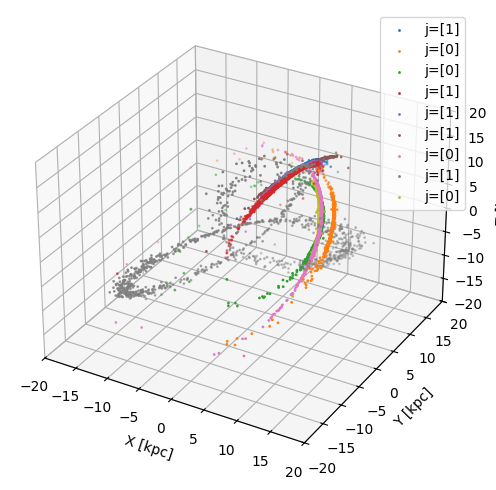

In [21]:
import numpy as np
import matplotlib.pyplot as plt 

# data = np.load('./training_set_galax.npz')
data = np.load('./training_set_odisseo.npz')
sim_data = data['sim_data']
j = data['j']
# id = 0
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
for id in range(9):
    # if id == 7:
    ax.scatter(sim_data[id, :, 0], sim_data[id, :, 1], sim_data[id, :, 2], s=1, label=f'j={j[id]}')
    ax.set_xlim([-20, 20])
    ax.set_ylim([-20, 20])
    ax.set_zlim([-20, 20])
    ax.set_xlabel('X [kpc]')
    ax.set_ylabel('Y [kpc]')
    ax.set_zlabel('Z [kpc]')
    ax.legend()
